In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from PIL import Image

In [3]:
from tensorflow.keras.layers import Input,Dense,Flatten,BatchNormalization,GlobalAveragePooling2D,Dropout,Conv2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

2024-06-25 15:24:22.083429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 15:24:22.083541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 15:24:22.200894: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
genobj=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)

In [5]:
np.array(Image.open('/kaggle/input/hand-gesture-recognition-dataset-one-hand/Dataset_RGB/Dataset_RGB/six/img 106.jpg')).shape

(300, 300, 3)

In [6]:
BATCH_SIZE=20

In [7]:
train_obj=genobj.flow_from_directory('/kaggle/input/hand-gesture-recognition-dataset-one-hand/Dataset_RGB/Dataset_RGB',target_size=(300,300),batch_size=BATCH_SIZE,subset='training')

Found 12000 images belonging to 15 classes.


In [8]:
val_obj=genobj.flow_from_directory('/kaggle/input/hand-gesture-recognition-dataset-one-hand/Dataset_RGB/Dataset_RGB',target_size=(300,300),batch_size=BATCH_SIZE,subset='validation')

Found 3000 images belonging to 15 classes.


In [9]:
train_obj.classes

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int32)

In [10]:
def plot_image():
    list_image_label=[]
    for i in range(9):
        batch=next(train_obj)
        rndm_no=np.random.randint(0,len(next(train_obj)[0]))
        list_image_label.append((batch[0][rndm_no],batch[1][rndm_no]))
    return list_image_label
    

In [11]:
list_img=plot_image()

{'down': 0,
 'eight': 1,
 'five': 2,
 'four': 3,
 'left': 4,
 'nine': 5,
 'one': 6,
 'right': 7,
 'seven': 8,
 'six': 9,
 'stop': 10,
 'three': 11,
 'two': 12,
 'up': 13,
 'zero': 14}

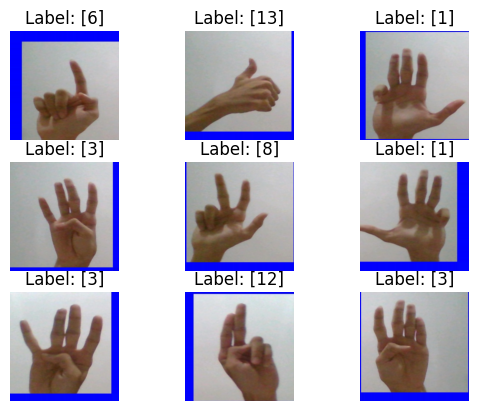

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
fig,axes=plt.subplots(3,3)
axes=axes.flatten()
count=0
for i,j in list_img:
    
    plt.figure()
    label=np.where(j==1)[0]
    axes[count].imshow(i, cmap='gray')
    axes[count].set_title(f'Label: {label}')
    axes[count].axis('off')
    count+=1
plt.tight_layout()
train_obj.class_indices

In [13]:
def draw_single(obj):
    batch=next(obj)
    image,label=batch[0][0],batch[1][0]
    return image,label

In [14]:
img,lbl=draw_single(train_obj)

(-0.5, 299.5, 299.5, -0.5)

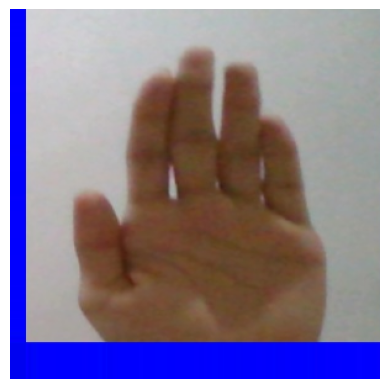

In [15]:
plt.imshow(img)
plt.axis('off')

In [16]:
input_shape=img.shape

In [17]:
from tensorflow.keras.optimizers import Adam

In [18]:
steps_per_epoch=12000//BATCH_SIZE

In [19]:
from tensorflow.keras.applications import ResNet50

In [20]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Add custom head for your specific task (e.g., classification)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

# Combine base model and custom head
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [21]:
r=model.fit(train_obj,batch_size=BATCH_SIZE,steps_per_epoch=steps_per_epoch,epochs=15,validation_data=val_obj)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1719329160.831760      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719329160.925326      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.7292 - loss: 0.8738

W0000 00:00:1719329428.647401      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


600/600 ━━━━━━━━━━━━━━━━━━━━ 403s 553ms/step - accuracy: 0.7294 - loss: 0.8729 - val_accuracy: 0.0667 - val_loss: 9.1050
Epoch 2/15


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


600/600 ━━━━━━━━━━━━━━━━━━━━ 54s 91ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0667 - val_loss: 9.1057
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 300s 495ms/step - accuracy: 0.9848 - loss: 0.0501 - val_accuracy: 0.7083 - val_loss: 2.0324
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 56s 94ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7087 - val_loss: 1.9955
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 283s 467ms/step - accuracy: 0.9892 - loss: 0.0362 - val_accuracy: 0.4873 - val_loss: 4.2159
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 55s 92ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4880 - val_loss: 4.1496
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 287s 473ms/step - accuracy: 0.9940 - loss: 0.0204 - val_accuracy: 0.9393 - val_loss: 0.1915
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 56s 93ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9413 - val_loss: 0.2026
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 285s 471ms/step - accur

In [22]:
from tensorflow.keras.models import save_model,load_model

In [23]:

save_model(model,'/kaggle/working/modelHG.h5')

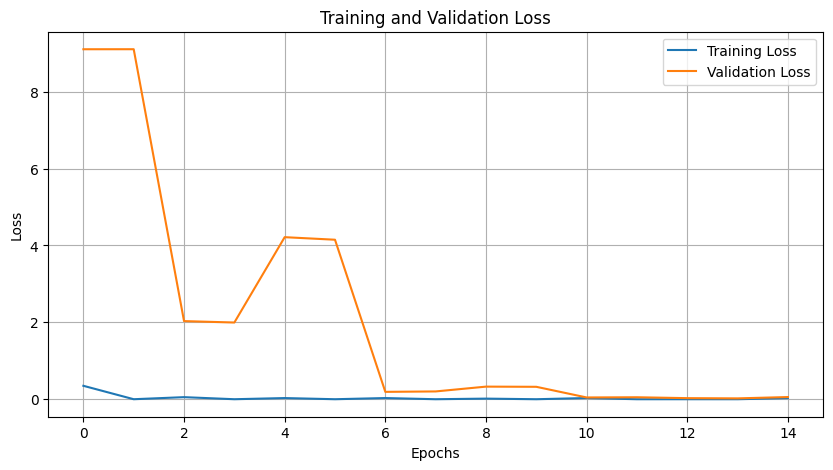

In [24]:
train_loss = r.history['loss']
val_loss = r.history['val_loss']

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
